# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

In [52]:
# import libraries 
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/

Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html

### Get_data()

The function get_data() is crated to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 

In [39]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [40]:
def get_data(tickers): 
    # get hourly data from the past 5 days
    # see yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [41]:
#get_data(tickers)


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The result is a Pandas dataframe, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a dataframe where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In [42]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

In [141]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1,2], index_col=0)

df_latest_tickers.head()

Price                                  Close                     \
Ticker                                  AAPL               AMZN   
Datetime                  Unnamed: 1_level_2 Unnamed: 2_level_2   
2025-10-20 13:30:00+00:00         259.505005         215.330002   
2025-10-20 14:30:00+00:00         262.570007         214.649994   
2025-10-20 15:30:00+00:00         263.489990         214.880005   
2025-10-20 16:30:00+00:00         263.165009         215.710007   
2025-10-20 17:30:00+00:00         263.730011         215.720001   

Price                                                            \
Ticker                                  GOOG               META   
Datetime                  Unnamed: 3_level_2 Unnamed: 4_level_2   
2025-10-20 13:30:00+00:00         256.595001         731.729980   
2025-10-20 14:30:00+00:00         256.869995         729.929993   
2025-10-20 15:30:00+00:00         256.859985         731.130005   
2025-10-20 16:30:00+00:00         256.750000         732.000000   
2025-10-20 17:30:00+00:00         256.730011         733.150024   

Price                                                 Dividends  \
Ticker                                  NFLX               AAPL   
Datetime                  Unnamed: 5_level_2 Unnamed: 6_level_2   
2025-10-20 13:30:00+00:00        1224.750000                0.0   
2025-10-20 14:30:00+00:00        1233.937012                0.0   
2025-10-20 15:30:00+00:00        1235.520020                0.0   
2025-10-20 16:30:00+00:00        1240.995728                0.0   
2025-10-20 17:30:00+00:00        1245.171021                0.0   

Price                                                            \
Ticker                                  AMZN               GOOG   
Datetime                  Unnamed: 7_level_2 Unnamed: 8_level_2   
2025-10-20 13:30:00+00:00                0.0                0.0   
2025-10-20 14:30:00+00:00                0.0                0.0   
2025-10-20 15:30:00+00:00                0.0                0.0   
2025-10-20 16:30:00+00:00                0.0                0.0   
2025-10-20 17:30:00+00:00                0.0                0.0   

Price                                                             ...  \
Ticker                                  META                NFLX  ...   
Datetime                  Unnamed: 9_level_2 Unnamed: 10_level_2  ...   
2025-10-20 13:30:00+00:00                0.0                 0.0  ...   
2025-10-20 14:30:00+00:00                0.0                 0.0  ...   
2025-10-20 15:30:00+00:00                0.0                 0.0  ...   
2025-10-20 16:30:00+00:00                0.0                 0.0  ...   
2025-10-20 17:30:00+00:00                0.0                 0.0  ...   

Price                            Stock Splits                      \
Ticker                                   AAPL                AMZN   
Datetime                  Unnamed: 26_level_2 Unnamed: 27_level_2   
2025-10-20 13:30:00+00:00                 0.0                 0.0   
2025-10-20 14:30:00+00:00                 0.0                 0.0   
2025-10-20 15:30:00+00:00                 0.0                 0.0   
2025-10-20 16:30:00+00:00                 0.0                 0.0   
2025-10-20 17:30:00+00:00                 0.0                 0.0   

Price                                                              \
Ticker                                   GOOG                META   
Datetime                  Unnamed: 28_level_2 Unnamed: 29_level_2   
2025-10-20 13:30:00+00:00                 0.0                 0.0   
2025-10-20 14:30:00+00:00                 0.0                 0.0   
2025-10-20 15:30:00+00:00                 0.0                 0.0   
2025-10-20 16:30:00+00:00                 0.0                 0.0   
2025-10-20 17:30:00+00:00                 0.0                 0.0   

Price                                                      Volume  \
Ticker                                   NFLX                AAPL   
Datetime               

In [159]:
# Create a new "Date" column to reformat datetime indexto remove timezone & seconds
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers.index.str.findall(r'\d{4}\-\d{2}\-\d{2}\s\d{2}:\d{2}').str[0]


Text(0.5, 1.0, 'FAANG Stocks - Close price over last 5 days')

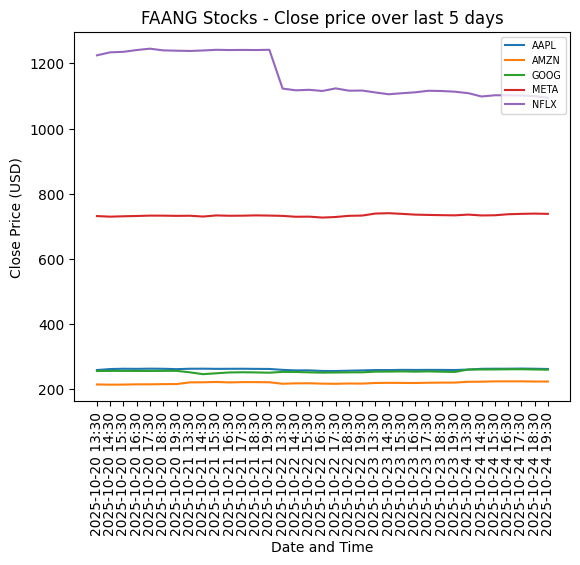

In [158]:
# get subset for closing prices 
Close_price = df_latest_tickers['Close']
# get index (date and time)
dates = df_latest_tickers['Date']

fig, ax = plt.subplots()
ax.plot(dates, Close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(dates, labels = dates, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')
